In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ultralytics import YOLO

#### Read image_xy and reconstructed image_xy from the csv file

In [2]:
image_xy = pd.read_csv('./image_xy.csv')
image_xy.tail(3)

,x,y
9,2262.2437,1434.0482
10,2178.6785,1338.0092
11,2010.3127,1185.6810


In [3]:
reconstructed_image_xy = pd.read_csv('./reconstructed_image_xy.csv')
reconstructed_image_xy.tail(3)

,linear_x,linear_y,quadratic_x,quadratic_y,cubic_x,cubic_y,quartic_x,quartic_y
9,2206.815903,1102.047686,2181.572497,1063.458202,2301.570172,1061.064073,2322.590845,1070.015687
10,1924.240856,1082.148016,1961.204498,994.126571,2097.262229,897.250884,2106.269321,865.157333
11,1603.132849,1059.534754,1678.740934,901.195995,1747.063628,618.516909,1740.481260,460.186648


In [4]:
image_data_path = ["Raspi_data/2023-12-10-14-55-35.jpg",
                   "Raspi_data/2023-12-10-14-55-44.jpg",
                   "Raspi_data/2023-12-10-14-55-53.jpg",
                   "Raspi_data/2023-12-10-14-56-02.jpg",
                   "Raspi_data/2023-12-10-14-56-11.jpg",
                   "Raspi_data/2023-12-10-14-56-19.jpg",
                   "Raspi_data/2023-12-10-14-56-28.jpg",
                   "Raspi_data/2023-12-10-14-56-37.jpg",
                   "Raspi_data/2023-12-10-14-56-46.jpg",
                   "Raspi_data/2023-12-10-14-56-55.jpg",
                   "Raspi_data/2023-12-10-14-57-03.jpg",
                   "Raspi_data/2023-12-10-14-57-12.jpg"]

In [5]:
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="coco128.yaml", epochs=3)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
# path = model.export(format="onnx")  # export the model to ONNX format


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /home/rahman2/CMPE691_CV/Project/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0
val: Scanning /home/rahman2/CMPE691_CV/Project/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 c
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Plotting labels to runs/detect/train39/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train39
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.55G      1.226      1.615      1.274        178        640: 100%|██████████| 8/8 [00:02<00:00,  3.39i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00

                   all        128        929      0.616      0.555      0.612      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      2.54G      1.225      1.513      1.268        231        640: 100%|██████████| 8/8 [00:01<00:00,  4.70i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00

                   all        128        929      0.673      0.543      0.625      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.72G      1.209      1.449      1.222        178        640: 100%|██████████| 8/8 [00:01<00:00,  5.29i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00

                   all        128        929      0.668      0.544       0.63      0.468



3 epochs completed in 0.003 hours.
Optimizer stripped from runs/detect/train39/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train39/weights/best.pt, 6.5MB

Validating runs/detect/train39/weights/best.pt...
Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 14931MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00


                   all        128        929       0.67      0.544      0.631      0.469
                person        128        254      0.794      0.668      0.769      0.542
               bicycle        128          6      0.578      0.333      0.328      0.281
                   car        128         46      0.868      0.217      0.286      0.178
            motorcycle        128          5      0.688      0.889      0.898      0.697
              airplane        128          6      0.827        0.8      0.903      0.673
                   bus        128          7      0.689      0.714      0.737      0.649
                 train        128          3      0.554      0.667       0.83      0.731
                 truck        128         12          1      0.365      0.479      0.294
                  boat        128          6      0.292      0.167      0.351      0.221
         traffic light        128         14      0.692      0.165      0.202      0.139
             stop sig

val: Scanning /home/rahman2/CMPE691_CV/Project/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 c
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00


                   all        128        929      0.656      0.545      0.629      0.469
                person        128        254      0.812      0.678      0.774      0.541
               bicycle        128          6      0.569      0.333      0.327      0.283
                   car        128         46      0.817      0.217      0.285      0.178
            motorcycle        128          5       0.69      0.896      0.898      0.697
              airplane        128          6      0.828      0.805      0.903      0.681
                   bus        128          7      0.683      0.714      0.736      0.648
                 train        128          3       0.55      0.667       0.83      0.731
                 truck        128         12          1      0.377      0.497      0.297
                  boat        128          6      0.262      0.167      0.319      0.155
         traffic light        128         14        0.7      0.171      0.202      0.139
             stop sig

In [6]:
images_with_bbox=[]
for image_path in image_data_path:
    results = model(image_path)
    ## Append the images overlayed with bounding boxes
    images_with_bbox.append(cv2.cvtColor(results[0].plot(),cv2.COLOR_BGR2RGB))


image 1/1 /home/rahman2/CMPE691_CV/Project/Raspi_data/2023-12-10-14-55-35.jpg: 480x640 1 person, 4 chairs, 74.7ms
Speed: 6.4ms preprocess, 74.7ms inference, 30.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/rahman2/CMPE691_CV/Project/Raspi_data/2023-12-10-14-55-44.jpg: 480x640 1 person, 4 chairs, 1 tv, 2 laptops, 8.8ms
Speed: 4.9ms preprocess, 8.8ms inference, 31.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/rahman2/CMPE691_CV/Project/Raspi_data/2023-12-10-14-55-53.jpg: 480x640 1 person, 5 chairs, 1 tv, 1 laptop, 8.2ms
Speed: 6.5ms preprocess, 8.2ms inference, 7.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/rahman2/CMPE691_CV/Project/Raspi_data/2023-12-10-14-56-02.jpg: 480x640 1 person, 5 chairs, 1 tv, 1 laptop, 11.0ms
Speed: 6.3ms preprocess, 11.0ms inference, 31.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/rahman2/CMPE691_CV/Project/Raspi_data/2023-12-10-14-56-11.jpg: 480x640 1 person, 5 chai

#### Add reconstructed image x,y coordinates from RADAR

In [7]:
for i,img in enumerate(images_with_bbox):
    x,y = int(image_xy['x'].iloc[i]),int(image_xy['y'].iloc[i])
    x1,y1 = int(reconstructed_image_xy['linear_x'].iloc[i]),int(reconstructed_image_xy['linear_y'].iloc[i])
    x2,y2 = int(reconstructed_image_xy['quadratic_x'].iloc[i]),int(reconstructed_image_xy['quadratic_y'].iloc[i])
    x3,y3 = int(reconstructed_image_xy['cubic_x'].iloc[i]),int(reconstructed_image_xy['cubic_y'].iloc[i])
    x4,y4 = int(reconstructed_image_xy['quartic_x'].iloc[i]),int(reconstructed_image_xy['quartic_y'].iloc[i])
    ### Add circles at over the images
    img = cv2.circle(img,(x,y),   radius=100, color=(0,255,0), thickness=10) # green
    img = cv2.circle(img,(x1,y1), radius=100, color=(255,255,255), thickness=10) # white 
    img = cv2.circle(img,(x2,y2), radius=100, color=(0,0,255), thickness=10) # red
    img = cv2.circle(img,(x3,y3), radius=100, color=(255,0,0), thickness=10) # blue
    img = cv2.circle(img,(x4,y4), radius=100, color=(0,255,255), thickness=10) # cyan
    # plt.figure()
    # plt.imshow(img)
    # plt.xticks([])
    # plt.yticks([])
    # plt.savefig(f"landmark{i}_no_blur.png",bbox_inches ="tight")

#### Blur the image using a 50x50 kernel

In [8]:
images_with_bbox_half_blur=[]
for image_path in image_data_path:
    img = cv2.imread(image_path)
    ## Blur the image 
    img = cv2.blur(img,(50,50))
    results = model(img)
    ## Append the images overlayed with bounding boxes
    images_with_bbox_half_blur.append(cv2.cvtColor(results[0].plot(),cv2.COLOR_BGR2RGB))


0: 480x640 1 person, 1 chair, 8.5ms
Speed: 5.9ms preprocess, 8.5ms inference, 30.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 8.3ms
Speed: 5.5ms preprocess, 8.3ms inference, 29.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 2 chairs, 11.0ms
Speed: 6.2ms preprocess, 11.0ms inference, 30.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 10.9ms
Speed: 6.7ms preprocess, 10.9ms inference, 31.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 2 chairs, 8.3ms
Speed: 6.6ms preprocess, 8.3ms inference, 29.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 chairs, 8.7ms
Speed: 6.2ms preprocess, 8.7ms inference, 30.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 2 chairs, 8.1ms
Speed: 5.9ms preprocess, 8.1ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 chairs, 8.8ms
Speed: 6.0ms preprocess, 8.8ms infer

In [9]:
for i,img in enumerate(images_with_bbox_half_blur):
    x1,y1 = int(reconstructed_image_xy['linear_x'].iloc[i]),int(reconstructed_image_xy['linear_y'].iloc[i])
    x2,y2 = int(reconstructed_image_xy['quadratic_x'].iloc[i]),int(reconstructed_image_xy['quadratic_y'].iloc[i])
    x3,y3 = int(reconstructed_image_xy['cubic_x'].iloc[i]),int(reconstructed_image_xy['cubic_y'].iloc[i])
    x4,y4 = int(reconstructed_image_xy['quartic_x'].iloc[i]),int(reconstructed_image_xy['quartic_y'].iloc[i])
    
    ### Add circles at over the images
    img = cv2.circle(img,(x1,y1), radius=100, color=(255,255,255), thickness=10) # white 
    img = cv2.circle(img,(x2,y2), radius=100, color=(0,0,255), thickness=10) # red
    img = cv2.circle(img,(x3,y3), radius=100, color=(255,0,0), thickness=10) # blue
    img = cv2.circle(img,(x4,y4), radius=100, color=(0,255,255), thickness=10) # cyan

#### Blur the image using a 100x100 kernel

In [10]:
images_with_bbox_full_blur=[]
for image_path in image_data_path:
    img = cv2.imread(image_path)
    ## Blur the image 
    img = cv2.blur(img,(100,100))
    results = model(img)
    ## Append the images overlayed with bounding boxes
    images_with_bbox_full_blur.append(cv2.cvtColor(results[0].plot(),cv2.COLOR_BGR2RGB))


0: 480x640 (no detections), 8.7ms
Speed: 5.7ms preprocess, 8.7ms inference, 23.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 7.5ms
Speed: 4.3ms preprocess, 7.5ms inference, 23.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 8.6ms
Speed: 6.4ms preprocess, 8.6ms inference, 23.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 8.4ms
Speed: 4.7ms preprocess, 8.4ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 11.4ms
Speed: 5.4ms preprocess, 11.4ms inference, 23.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 8.6ms
Speed: 4.8ms preprocess, 8.6ms inference, 23.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 10.4ms
Speed: 6.2ms preprocess, 10.4ms inference, 23.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 8.7ms
Speed: 4.7ms preprocess, 8.7ms inferen

In [11]:
for i,img in enumerate(images_with_bbox_full_blur):
    x1,y1 = int(reconstructed_image_xy['linear_x'].iloc[i]),int(reconstructed_image_xy['linear_y'].iloc[i])
    x2,y2 = int(reconstructed_image_xy['quadratic_x'].iloc[i]),int(reconstructed_image_xy['quadratic_y'].iloc[i])
    x3,y3 = int(reconstructed_image_xy['cubic_x'].iloc[i]),int(reconstructed_image_xy['cubic_y'].iloc[i])
    x4,y4 = int(reconstructed_image_xy['quartic_x'].iloc[i]),int(reconstructed_image_xy['quartic_y'].iloc[i])
    
    ### Add circles at over the images
    img = cv2.circle(img,(x1,y1), radius=100, color=(255,255,255), thickness=10) # white 
    img = cv2.circle(img,(x2,y2), radius=100, color=(0,0,255), thickness=10) # red
    img = cv2.circle(img,(x3,y3), radius=100, color=(255,0,0), thickness=10) # blue
    img = cv2.circle(img,(x4,y4), radius=100, color=(0,255,255), thickness=10) # cyan

#### Display the images

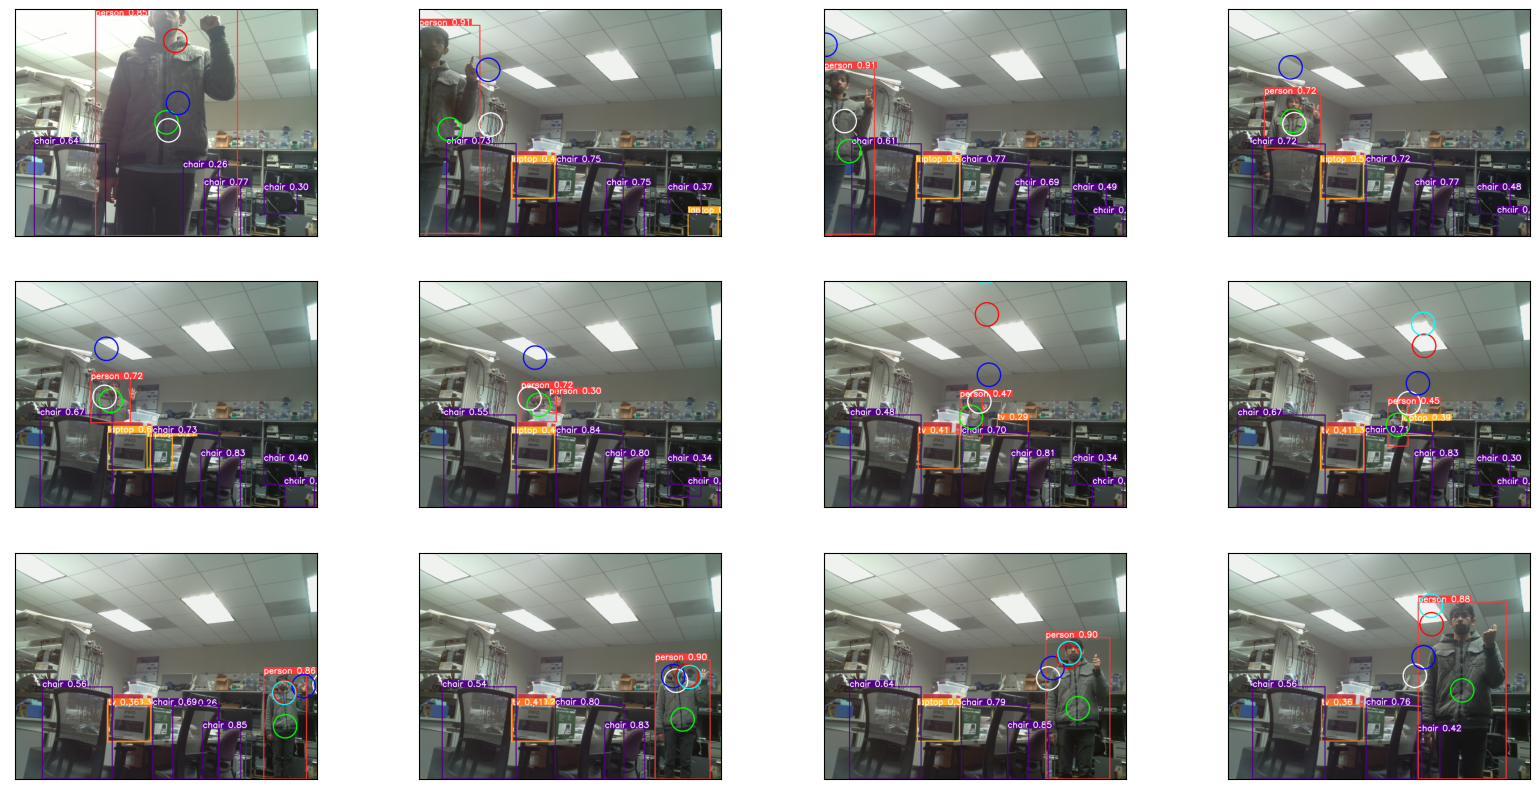

In [12]:
f, axarr = plt.subplots(3,4,figsize=(20,10))

axarr[0,0].imshow(images_with_bbox[0])
axarr[0,0].set_xticks([], minor=False)
axarr[0,0].set_yticks([], minor=False)
axarr[0,1].imshow(images_with_bbox[1])
axarr[0,1].set_xticks([], minor=False)
axarr[0,1].set_yticks([], minor=False)
axarr[0,2].imshow(images_with_bbox[2])
axarr[0,2].set_xticks([], minor=False)
axarr[0,2].set_yticks([], minor=False)
axarr[0,3].imshow(images_with_bbox[3])
axarr[0,3].set_xticks([], minor=False)
axarr[0,3].set_yticks([], minor=False)

axarr[1,0].imshow(images_with_bbox[4])
axarr[1,0].set_xticks([], minor=False)
axarr[1,0].set_yticks([], minor=False)
axarr[1,1].imshow(images_with_bbox[5])
axarr[1,1].set_xticks([], minor=False)
axarr[1,1].set_yticks([], minor=False)
axarr[1,2].imshow(images_with_bbox[6])
axarr[1,2].set_xticks([], minor=False)
axarr[1,2].set_yticks([], minor=False)
axarr[1,3].imshow(images_with_bbox[7])
axarr[1,3].set_xticks([], minor=False)
axarr[1,3].set_yticks([], minor=False)

axarr[2,0].imshow(images_with_bbox[8])
axarr[2,0].set_xticks([], minor=False)
axarr[2,0].set_yticks([], minor=False)
axarr[2,1].imshow(images_with_bbox[9])
axarr[2,1].set_xticks([], minor=False)
axarr[2,1].set_yticks([], minor=False)
axarr[2,2].imshow(images_with_bbox[10])
axarr[2,2].set_xticks([], minor=False)
axarr[2,2].set_yticks([], minor=False)
axarr[2,3].imshow(images_with_bbox[11])
axarr[2,3].set_xticks([], minor=False)
axarr[2,3].set_yticks([], minor=False)
plt.show()

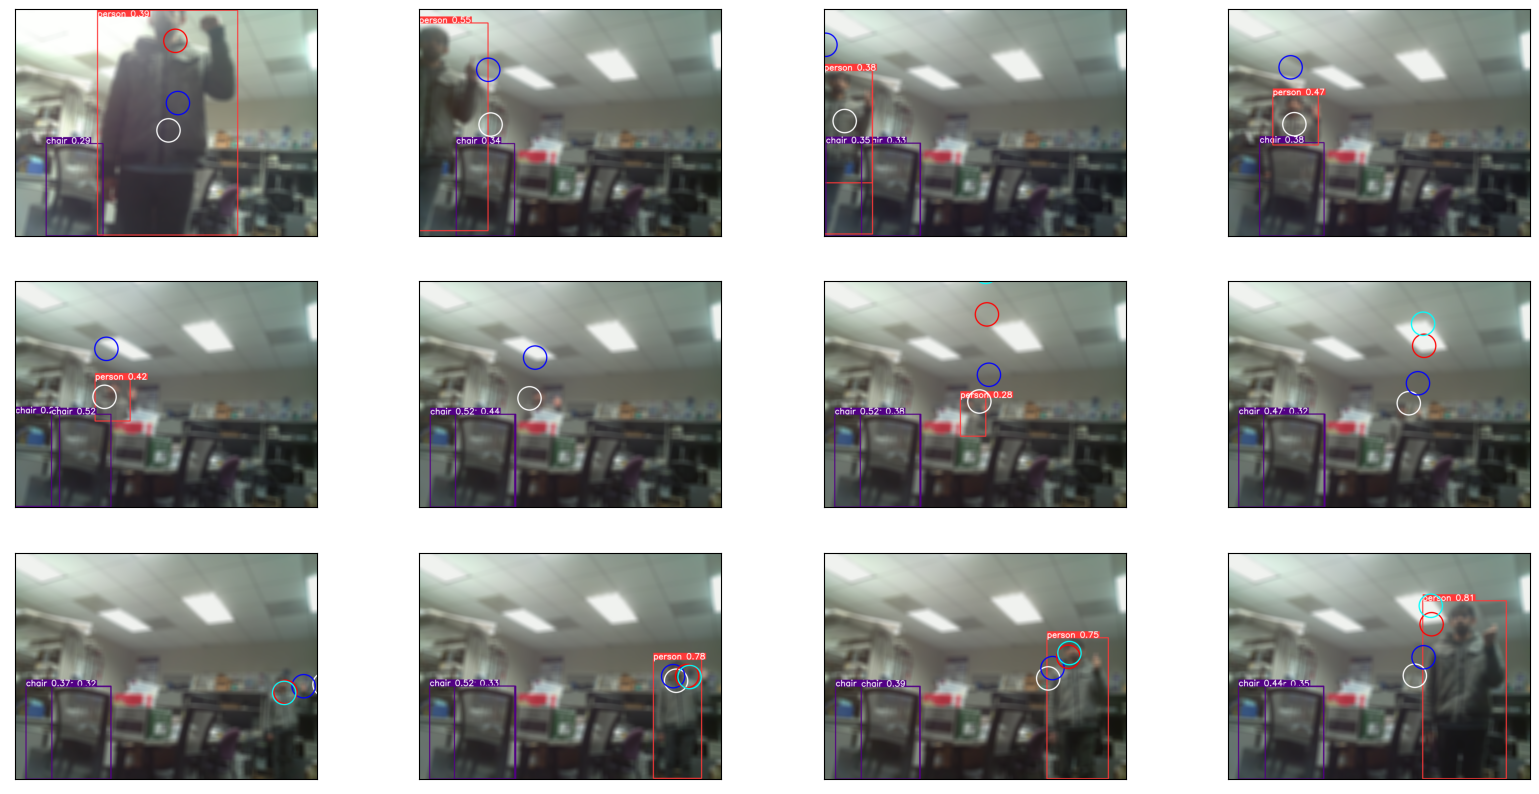

In [13]:
f, axarr = plt.subplots(3,4,figsize=(20,10))

axarr[0,0].imshow(images_with_bbox_half_blur[0])
axarr[0,0].set_xticks([], minor=False)
axarr[0,0].set_yticks([], minor=False)
axarr[0,1].imshow(images_with_bbox_half_blur[1])
axarr[0,1].set_xticks([], minor=False)
axarr[0,1].set_yticks([], minor=False)
axarr[0,2].imshow(images_with_bbox_half_blur[2])
axarr[0,2].set_xticks([], minor=False)
axarr[0,2].set_yticks([], minor=False)
axarr[0,3].imshow(images_with_bbox_half_blur[3])
axarr[0,3].set_xticks([], minor=False)
axarr[0,3].set_yticks([], minor=False)

axarr[1,0].imshow(images_with_bbox_half_blur[4])
axarr[1,0].set_xticks([], minor=False)
axarr[1,0].set_yticks([], minor=False)
axarr[1,1].imshow(images_with_bbox_half_blur[5])
axarr[1,1].set_xticks([], minor=False)
axarr[1,1].set_yticks([], minor=False)
axarr[1,2].imshow(images_with_bbox_half_blur[6])
axarr[1,2].set_xticks([], minor=False)
axarr[1,2].set_yticks([], minor=False)
axarr[1,3].imshow(images_with_bbox_half_blur[7])
axarr[1,3].set_xticks([], minor=False)
axarr[1,3].set_yticks([], minor=False)

axarr[2,0].imshow(images_with_bbox_half_blur[8])
axarr[2,0].set_xticks([], minor=False)
axarr[2,0].set_yticks([], minor=False)
axarr[2,1].imshow(images_with_bbox_half_blur[9])
axarr[2,1].set_xticks([], minor=False)
axarr[2,1].set_yticks([], minor=False)
axarr[2,2].imshow(images_with_bbox_half_blur[10])
axarr[2,2].set_xticks([], minor=False)
axarr[2,2].set_yticks([], minor=False)
axarr[2,3].imshow(images_with_bbox_half_blur[11])
axarr[2,3].set_xticks([], minor=False)
axarr[2,3].set_yticks([], minor=False)
plt.show()

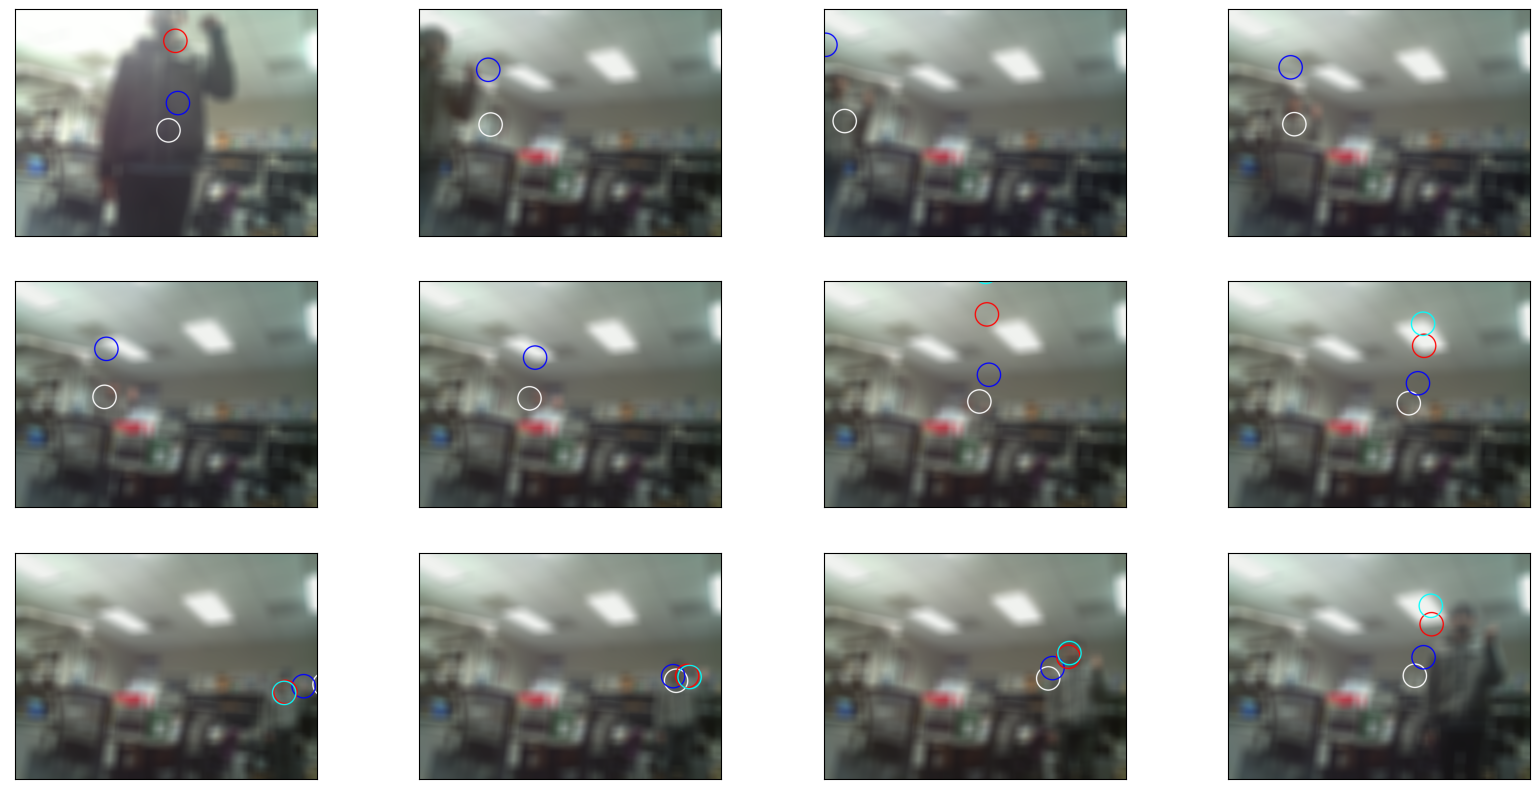

In [14]:
f, axarr = plt.subplots(3,4,figsize=(20,10))

axarr[0,0].imshow(images_with_bbox_full_blur[0])
axarr[0,0].set_xticks([], minor=False)
axarr[0,0].set_yticks([], minor=False)
axarr[0,1].imshow(images_with_bbox_full_blur[1])
axarr[0,1].set_xticks([], minor=False)
axarr[0,1].set_yticks([], minor=False)
axarr[0,2].imshow(images_with_bbox_full_blur[2])
axarr[0,2].set_xticks([], minor=False)
axarr[0,2].set_yticks([], minor=False)
axarr[0,3].imshow(images_with_bbox_full_blur[3])
axarr[0,3].set_xticks([], minor=False)
axarr[0,3].set_yticks([], minor=False)

axarr[1,0].imshow(images_with_bbox_full_blur[4])
axarr[1,0].set_xticks([], minor=False)
axarr[1,0].set_yticks([], minor=False)
axarr[1,1].imshow(images_with_bbox_full_blur[5])
axarr[1,1].set_xticks([], minor=False)
axarr[1,1].set_yticks([], minor=False)
axarr[1,2].imshow(images_with_bbox_full_blur[6])
axarr[1,2].set_xticks([], minor=False)
axarr[1,2].set_yticks([], minor=False)
axarr[1,3].imshow(images_with_bbox_full_blur[7])
axarr[1,3].set_xticks([], minor=False)
axarr[1,3].set_yticks([], minor=False)

axarr[2,0].imshow(images_with_bbox_full_blur[8])
axarr[2,0].set_xticks([], minor=False)
axarr[2,0].set_yticks([], minor=False)
axarr[2,1].imshow(images_with_bbox_full_blur[9])
axarr[2,1].set_xticks([], minor=False)
axarr[2,1].set_yticks([], minor=False)
axarr[2,2].imshow(images_with_bbox_full_blur[10])
axarr[2,2].set_xticks([], minor=False)
axarr[2,2].set_yticks([], minor=False)
axarr[2,3].imshow(images_with_bbox_full_blur[11])
axarr[2,3].set_xticks([], minor=False)
axarr[2,3].set_yticks([], minor=False)
plt.show()

#### Delete the image lists (Not deleting might cause memory leaks) 

In [15]:
del images_with_bbox
del images_with_bbox_half_blur
del images_with_bbox_full_blur